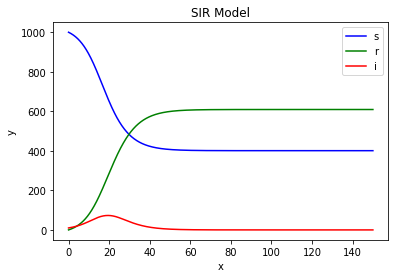

In [1]:
# In the ODE simulation, you will model time dependent variables: S, I, R
# which represent the total number of individuals in each population 
# (if the total population has N individuals, then S + I + R = N at all times),
# as well as s, i, r, the fraction of each population in the total population, 
# e.g. s(t) = S(t) / N (i.e. s + i + r = 1 at all times).

# 1 ds/dt = -b * s(t) * i(t)
# 2 dr/dt = k * i(t)
# 3 di/dt = b * s(t) * i(t) - k * i(t)
# Equation 1 captures how susceptible people are made sick by infectious people by interacting with parameter b. 
# Equation 2 captures how infectious people enter the removed population at rate k
# Equation 3 captures how susceptible people become infected, and infectious people are removed.






import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
b = 1/2    #Set the initial condition
k = 1/3



def SIR(t, X):
    
    #The main set of equations
    Y = np.zeros((3))
    Y[0] = -b * X[0] * X[2]
    Y[1] = k * X[2] 
    Y[2] = b * X[0] * X[2] - (k * X[2])
    return Y



t_eval = np.linspace(0, 150, 1000)
sol1 = solve_ivp(SIR, [0, 150], [1, 0, 0.01], method='RK45', t_eval=t_eval)    # solve the equation



plt.plot(sol1.t, sol1.y[0]*1000, c='b',label='s')    # generate the plot
plt.plot(sol1.t, sol1.y[1]*1000, c='g',label='r')
plt.plot(sol1.t, sol1.y[2]*1000, c='r',label='i')


plt.title("SIR Model")
plt.ylabel("y")
plt.xlabel("x")
plt.legend(['s','r','i'])
plt.show()


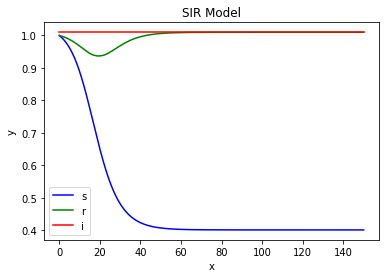

In [2]:
plt.plot(sol1.t, sol1.y[0], c='b',label='s')    # generate the plot
plt.plot(sol1.t, sol1.y[0]+sol1.y[1], c='g',label='r')
plt.plot(sol1.t, sol1.y[0]+sol1.y[1]+sol1.y[2], c='r',label='i')


plt.title("SIR Model")
plt.ylabel("y")
plt.xlabel("x")
plt.legend(['s','r','i'])
plt.show()



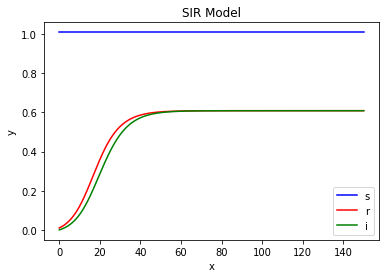

In [3]:
plt.plot(sol1.t, sol1.y[0]+sol1.y[1]+sol1.y[2], c='b',label='s')    # generate the plot
plt.plot(sol1.t, sol1.y[1]+sol1.y[2], c='r',label='i')
plt.plot(sol1.t, sol1.y[1], c='g',label='r')


plt.title("SIR Model")
plt.ylabel("y")
plt.xlabel("x")
plt.legend(['s','r','i'])
plt.show()





In [49]:
class Person():
    """
    An agent representing a person.
    
    By default, a person is susceptible but not infectious. They can become infectious by exposing with disease method.
    """  
    
    def __init__(self):
        self.susceptible = True 
        self.infected = False 
        self.removed = False
        self.pos = np.random.rand(2)
    
    def is_susceptible(self):
        """
        returns true if the person is susceptible
        """
        return self.susceptible

    def susceptible(self):
        """
        once the person
        """
        self.susceptible = True
        
    def is_infected(self):
        """
        returns true if the person is infectious
        """
        return self.infected

    def infection(self):
        """
        once the person
        """
        self.removed = False
        self.infected = True
        self.susceptible = False
      
    def is_removed(self):
        """
        returns true if the person is recovered
        """
        return self.removed

    def remove(self):
        """
        once the person
        """
        self.susceptibe= False
        self.removed = True
        self.infected = False

In [5]:
N = 700  # population size: which are also susceptible people
I = 200 # Infected people
R = 100 # Removed people and won't get it again
k = 5     # number of people  interact with
p = 0.1   # probability that people getting infectious 
q = 0.1   # probability that people getting recovered

pop = [Person() for i in range(N)] # our population
print(pop[0].is_infected())
pop[0].infection() # keep track of infectious\ people
print(pop[0].is_infected())

False
True


In [6]:
# Function that will simulate all interactions in a day
from numpy.random import randint, rand

for i in range(N):
    if pop[i].is_infected():
        # person i infected all their contacts
        contacts = randint(N, size=k)
        for j in contacts:
            if not pop[j].is_removed():
                if rand() < p:
                    pop[j].infection()
        if rand()< q:
            pop[i].remove()


In [7]:
def count_susceptible(pop):
    return sum(p.is_susceptible() for p in pop)

count_susceptible(pop)

699

In [8]:

# we want to count how many people are infected at the end of the day
def count_infected(pop):
    return sum(p.is_infected() for p in pop)

count_infected(pop)

1

In [9]:
def count_removed(pop):
    return sum(p.is_removed() for p in pop)

count_removed(pop)

0

In [10]:
N=1000
k=5
T= 100
n=1000
pop = [Person() for i in range(n)]
initial_infection = randint(n,size=np.int(n*0.01))
for i in initial_infection:
    pop[i].infection()
    
counts_susceptible = [count_susceptible(pop)]
counts_infected = [count_infected(pop)]
counts_removed = [count_removed(pop)]

for t in range(T):
    # update the population
    for i in range(N):
        if pop[i].is_infected():
            # person i infected all their contacts
            contacts = randint(N, size=k)
            for j in contacts:
                if not pop[j].is_removed():
                    if rand() < p:
                        pop[j].infection()
            if rand()< q:
                pop[i].remove()
                    
    # add to our counts
    counts_susceptible.append(count_susceptible(pop))
    counts_infected.append(count_infected(pop))
    counts_removed.append(count_removed(pop))

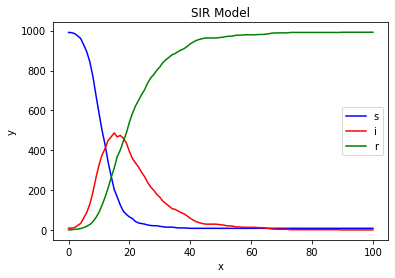

In [11]:
plt.plot(range(T+1), counts_susceptible, c='b',label='s')    # generate the plot
plt.plot(range(T+1), counts_infected, c='r',label='i')
plt.plot(range(T+1), counts_removed, c='g',label='r')


plt.title("SIR Model")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()



In [12]:
test=np.array([counts_susceptible,counts_infected,counts_removed])

In [13]:
test[2]

array([  0,   1,   3,   4,   7,  12,  19,  27,  41,  62,  88, 124, 164,
       210, 263, 310, 368, 401, 446, 486, 541, 585, 622, 650, 679, 704,
       737, 763, 780, 801, 818, 840, 854, 866, 879, 885, 895, 903, 910,
       921, 934, 943, 951, 956, 960, 963, 963, 963, 963, 964, 966, 968,
       971, 972, 973, 977, 977, 978, 979, 979, 979, 979, 980, 981, 981,
       983, 985, 988, 988, 989, 989, 989, 989, 991, 991, 991, 991, 991,
       991, 991, 991, 991, 991, 991, 991, 991, 991, 991, 991, 991, 992,
       992, 992, 992, 992, 992, 992, 992, 992, 992, 992])

In [14]:
N=1000
k=5
T= 100
n=1000
pop = [Person() for i in range(n)]
initial_infection = randint(n,size=np.int(n*0.01))
for i in initial_infection:
    pop[i].infection()

In [15]:
count_infected(pop)

10

In [12]:
import numpy as np
from scipy.spatial import KDTree, cKDTree
import matplotlib.pyplot as plt

In [4]:
np.random.rand(2)

array([0.36718318, 0.56421844])

In [5]:
import random

# step 1: initialize an individual 
x = random.uniform(0, 1) # generate a random number between 0 and 1, not sure it covers 1??
y = random.uniform(0, 1)
pos = np.array([x,y]) # position for x and y
pos

array([0.03249305, 0.10517589])

In [6]:

# step 2: generate p and q, and sample 2d diretion 

p = random.uniform(0, 1) # generate length of p 
q = random.uniform(0, 1) # generate radius of q 

dpos = np.random.randn(2)
dpos = dpos / np.linalg.norm(dpos) 
print(dpos * p) # moving diretion 
print(q)

[0.42584297 0.37311628]
0.8391704147817959


In [7]:
# current position 
currentPos = pos + dpos * p
print(currentPos)

# some special cases in the edge of the space
if currentPos[0]<0 or currentPos[0]>1: 
    currentPos[0] = pos[0]
if currentPos[1]<0 or currentPos[1]>1:
    currentPos[1] = pos[1] 
print(currentPos)

[0.45833602 0.47829216]
[0.45833602 0.47829216]


In [8]:
N = 1000
d = 2
X = np.random.rand(N,d)
#plt.scatter(X[:,0], X[:,1])
#plt.show()

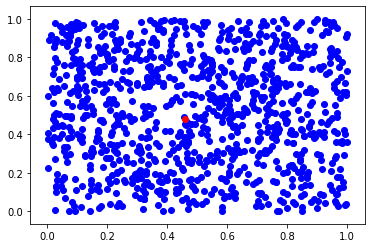

In [15]:
# making some visual representation about the contact people 
tree = KDTree(X)
inds = tree.query_ball_point(currentPos, q) # finds neighbors in ball of radius q? why this is not surrounding by red??? 
inds = inds[0]
plt.scatter(X[:,0], X[:,1], c='b')
plt.scatter(currentPos[0], currentPos[1], c='r')
plt.show()

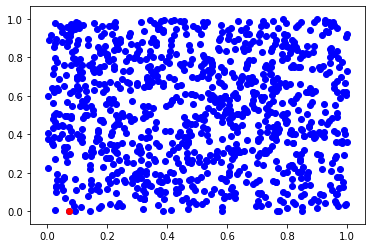

In [28]:

# making some visual representation about the contact people 
tree = KDTree(X)
inds = tree.query_ball_point(currentPos, 2) # finds neighbors in ball of radius q? why this is not surrounding by red??? 
inds = inds[0]
plt.scatter(X[:,0], X[:,1], c='b')
plt.scatter(X[inds,0], X[inds,1], c='r')
plt.show()

In [29]:
inds

95

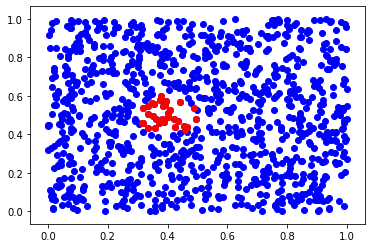

In [21]:
N1 = 1000
d1 = 2
X1 = np.random.rand(N1,d1)

x1 = np.array([[0.4,0.5]])
tree = KDTree(X1)
inds = tree.query_ball_point(x1, 0.1) # finds neighbors in ball of radius 0.1
inds = inds[0]
plt.scatter(X1[:,0], X1[:,1], c='b')
plt.scatter(X1[inds,0], X1[inds,1], c='r')
plt.show()

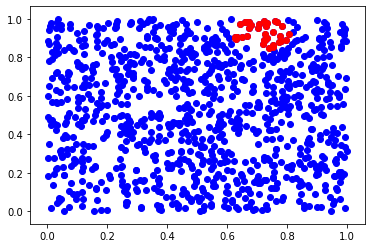

In [37]:
N = 1000
d = 2
X = np.random.rand(N,d)
tree = KDTree(X)
inds = tree.query_ball_point([np.random.rand(2)], 0.1) # finds neighbors in ball of radius q? why this is not surrounding by red??? 
inds = inds[0]
plt.scatter(X[:,0], X[:,1], c='b')
plt.scatter(X[inds,0], X[inds,1], c='r')
plt.show()

In [32]:
print(x1)
print(currentPos)

[[0.4 0.5]]
[0.45833602 0.47829216]


In [51]:
pop = [Person() for i in range(20)]

In [53]:
for i in range(20):
    print(pop[i].pos)

[0.59249898 0.12259086]
[0.52228356 0.17227031]
[0.9204049  0.79041378]
[0.12074097 0.20651106]
[0.47494239 0.57155161]
[0.80413453 0.20909581]
[0.89544295 0.39699572]
[0.11489501 0.43555959]
[0.07421634 0.35023227]
[0.2302786  0.81717757]
[0.7612922  0.92652056]
[0.39493434 0.38556011]
[0.61353775 0.93040064]
[0.8942059 0.8657983]
[0.71104786 0.47041204]
[0.42263718 0.21170005]
[0.99191261 0.17714254]
[0.60582752 0.95842896]
[0.59357204 0.74564382]
[0.98395552 0.6722355 ]


In [ ]:
def matrixX(pop,N):
    """
    create matrix X, which stores the position of the population, for KDtree
    """
    X=np.random.rand(N,2)
    for i in range(N):
        X[i]=pop[i].pos
    return X

In [41]:
np.random.rand(2,2)

array([[0.54151404, 0.63164303],
       [0.69098009, 0.12587125]])

In [47]:
t1=np.random.rand(2)
t2=np.random.rand(2)
np.concatenate([t1,t2]).reshape(2,2)

array([[0.02867349, 0.77670848],
       [0.84327039, 0.10948744]])

In [57]:
X=np.random.rand(20,2)

In [59]:
X[0]

array([0.09160907, 0.40031999])

In [ ]:
def SIR_discrete(N,ii,p,q,T,k):
    """
    Simulates discrete SIR model
    N = Total number of people
    ii = initial percentage of infected
    p = step of length p
    q = individual radius of interact people
    T = Days of simulation
    k = probability that people getting recovered
    
    returns list of s,i,r
    """
    pop = [Person() for i in range(N)]
    initial_infection = randint(N,size=np.int(N*ii))
    for i in initial_infection:
        pop[i].infection()

    counts_susceptible = [count_susceptible(pop)]
    counts_infected = [count_infected(pop)]
    counts_removed = [count_removed(pop)]
    
    def matrixX(pop,N):
    """
    create matrix X, which stores the position of the population, for KDtree
    """
        X=np.random.rand(N,2)
        for i in range(N):
            X[i]=pop[i].pos
        return X
    

    for t in range(T):
        # update the population
        for i in range(N):
            pop[i].newpos(p)
            if pop[i].is_infected():
                # person i infected all their contacts
                X = matrixX(pop,N) # a 2d spatial matrix 
                tree = KDTree(X)
                inds = tree.query_ball_point(pop[i].pos, q) # finds neighbors in ball of radius q        
                contacts = inds # From my understand, inds is the total contact people, But not sure????
                for j in contacts:
                    if not pop[j].is_removed():
                        pop[j].infection()
                        #if rand() < p:
                        #    pop[j].infection()
                if rand()< k:
                    pop[i].remove()

        # add to our counts
        counts_susceptible.append(count_susceptible(pop))
        counts_infected.append(count_infected(pop))
        counts_removed.append(count_removed(pop))
    return np.array([counts_susceptible,counts_infected,counts_removed])